Because of env problem locally I check shapley values in colab studio

In [ ]:
!pip install shap

And we have to upload train, test and pkl files.

In [10]:
import pickle
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


X = pd.read_csv("X_test.csv")
y = pd.read_csv("y_test.csv")

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

In [13]:
y_train.shape, y.shape

((14484, 1), (3596, 1))

Random Forest Classifier

In [11]:
#incompatible pickling model :(

rf_model = RandomForestClassifier(random_state=123,
                                n_estimators=300,
                                max_depth=7)
rf_model.fit(X_train, y_train)

<ipython-input-11-3551f60cfacc>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_estimators=300, random_state=123)

In [16]:
!python -V

Python 3.10.12


Unfortunatelly I think there is a bug in a version of package for Python 3.10. Probably I am going to report this on github with a new issue. In the local env I also see this "cutting" visualization effect.

100%|===================| 7190/7192 [03:35<00:00]       

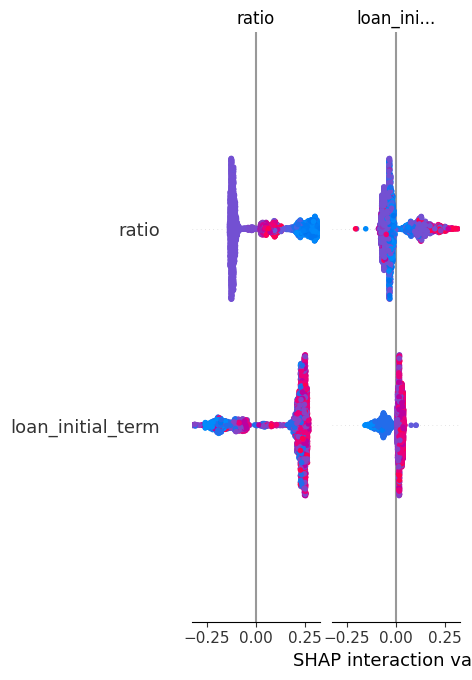

In [14]:
# with open('rf_clf.pkl', 'rb') as file:
#     rf_model = pickle.load(file)

explainer = shap.Explainer(rf_model, X)
shap_values = explainer.shap_values(X, check_additivity=False)
shap.summary_plot(shap_values, X, title="Random Forest Classifier")

XGB Classifier

 99%|===================| 3562/3596 [01:09<00:00]       

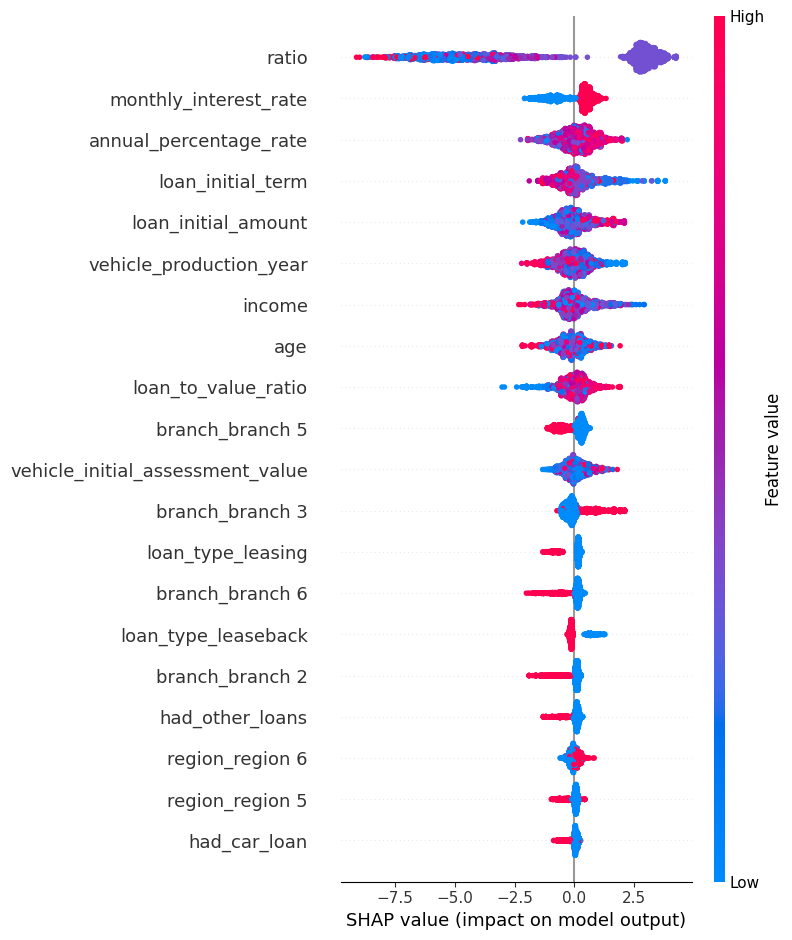

In [7]:
with open('xgb_clf.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

explainer = shap.Explainer(xgb_model, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, title="XGB Classifier")